# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [1]:
# your code here
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# your code here
df = pd.read_csv('exch_rates.csv')
df.head()

,Frequency,Euro,Australian Dollar,Danish Krone
0,2000-01-01,NaN,NaN,NaN
1,2000-01-02,NaN,NaN,NaN
2,2000-01-03,0.991080,1.520912,7.374034
3,2000-01-04,0.970403,1.521300,7.222610
4,2000-01-05,0.964506,1.521316,7.180170


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6905 entries, 0 to 6904
Data columns (total 4 columns):
Frequency            6905 non-null object
Euro                 4838 non-null float64
Australian Dollar    4838 non-null float64
Danish Krone         4838 non-null float64
dtypes: float64(3), object(1)
memory usage: 215.9+ KB


In [5]:
df['Frequency'] = pd.to_datetime(df.Frequency)
df.set_index('Frequency', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6905 entries, 2000-01-01 to 2018-11-26
Data columns (total 3 columns):
Euro                 4838 non-null float64
Australian Dollar    4838 non-null float64
Danish Krone         4838 non-null float64
dtypes: float64(3)
memory usage: 215.8 KB


Plot the three exchange rates in one plot

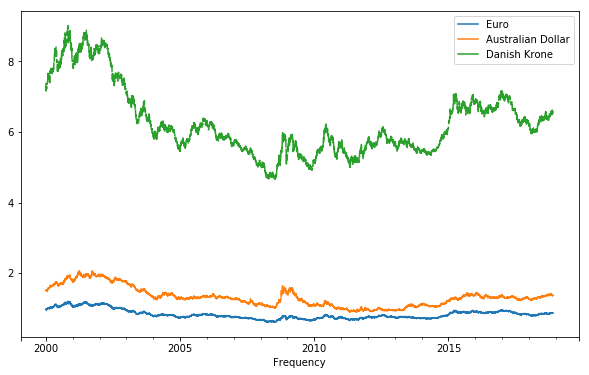

In [7]:
# your code here
df.plot(figsize = (10,6))

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [8]:
# your code here
df.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

The Australian Dollar and Euro are highly correlated, but the Danish Krone and the Euro are perfectly correlated.

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

In [9]:
# your code here
df_diff = df.diff(periods = 1)

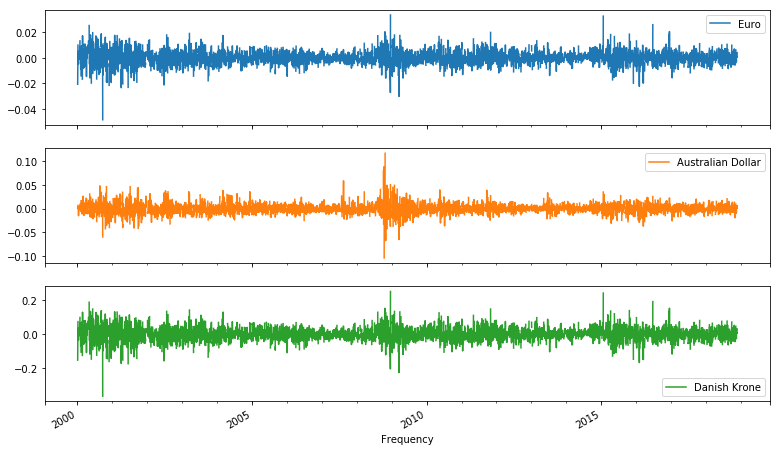

In [11]:
# your code here
df_diff.plot(figsize = (13,8), subplots=True, legend=True);

In [12]:
# your code here
df_diff.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.545369,0.999667
Australian Dollar,0.545369,1.000000,0.545133
Danish Krone,0.999667,0.545133,1.000000


### Explain what's going on

Differencing resulted in less correlation between Australian dollar and Euro. This is due to the fact that seasonality is not present.

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

In [14]:
# your code here
euro = df[['Euro']]
xr_shift_1 = euro.shift(periods=1)
xr_shift_1.head()

,Euro
Frequency,
2000-01-01,NaN
2000-01-02,NaN
2000-01-03,NaN
2000-01-04,0.991080
2000-01-05,0.970403


In [18]:
# your code here
lag_1= pd.concat([xr_shift_1, euro], axis=1)

lag_1.corr()

,Euro,Euro
Euro,1.000000,0.999146
Euro,0.999146,1.000000


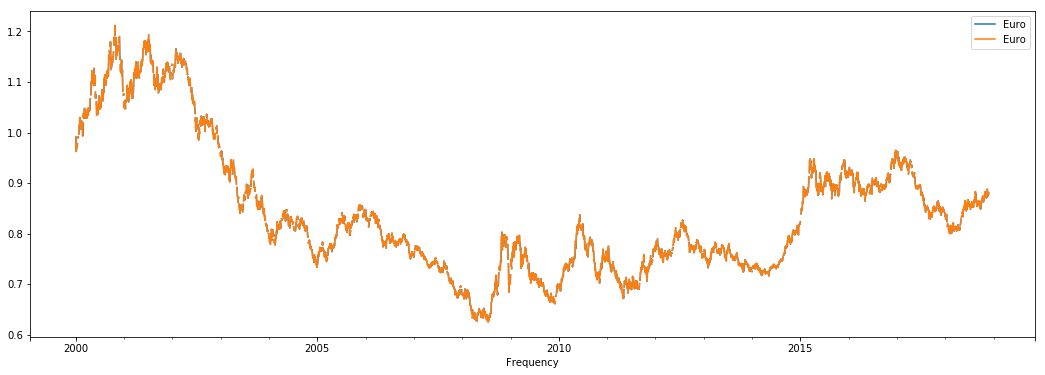

In [19]:
# your code here
lag_1.plot(figsize=(18,6))

Repeat this, but for a "lag 5 autocorrelation"

In [20]:
# your code here
xr_shift_5 = euro.shift(periods=5)
xr_shift_5.head()

,Euro
Frequency,
2000-01-01,NaN
2000-01-02,NaN
2000-01-03,NaN
2000-01-04,NaN
2000-01-05,NaN


In [21]:
# your code here
lag_5= pd.concat([xr_shift_5, euro], axis=1)

lag_5.corr()

,Euro,Euro
Euro,1.000000,0.997518
Euro,0.997518,1.000000


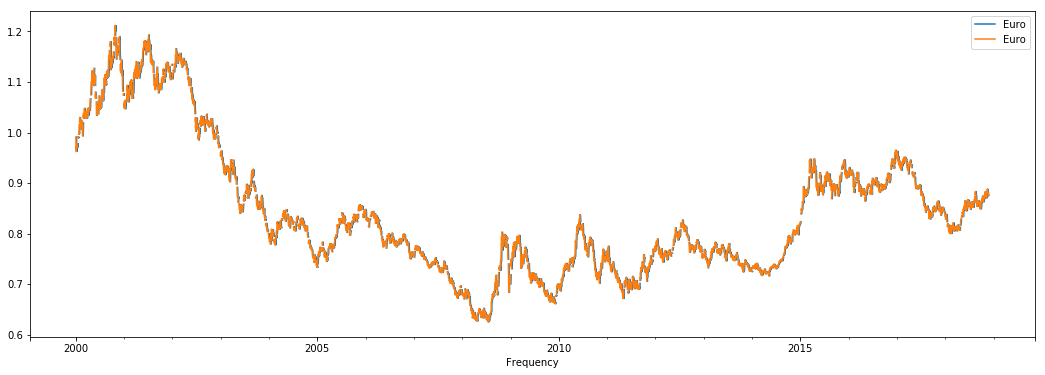

In [22]:
lag_5.plot(figsize=(18,6))

### What's your conclusion here?

The lag series is still highly correlated at lag 5. This is because the values depend very much on the previous values.

Knowing this, let's plot the ACF now.

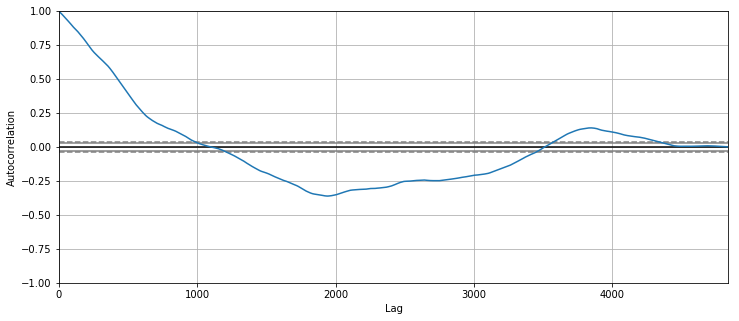

In [24]:
# your code here
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(euro.dropna());

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

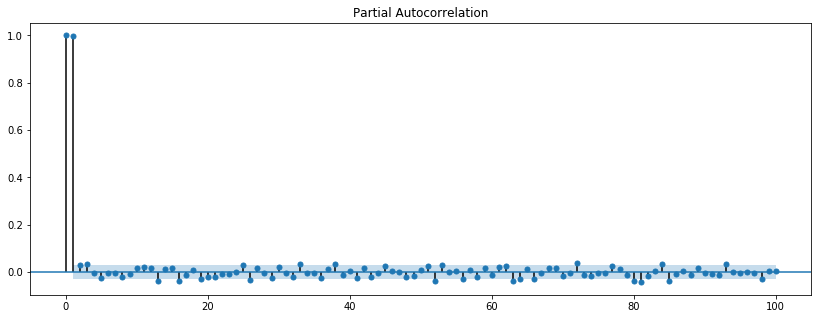

In [25]:
# your code here
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(euro.dropna(), lags = 100);

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [26]:
# your code here
df_pass = pd.read_csv('passengers.csv')
df_pass.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [27]:
# your code here
df_pass['Month'] = pd.to_datetime(df_pass.Month)
df_pass.set_index('Month', inplace = True)
df_pass.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


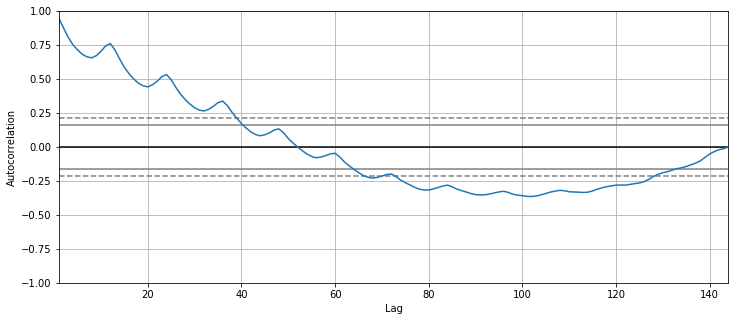

In [30]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(df_pass.dropna())

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


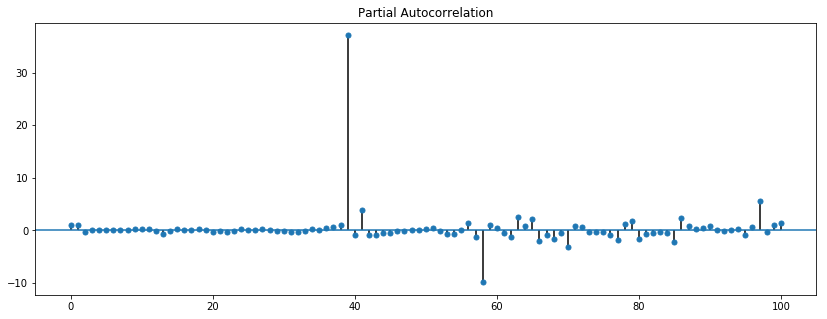

In [31]:
# your code here
rcParams['figure.figsize'] = 14, 5

plot_pacf(df_pass.dropna(), lags = 100);

In [32]:
df_pass_diff = df_pass.diff(periods = 1)

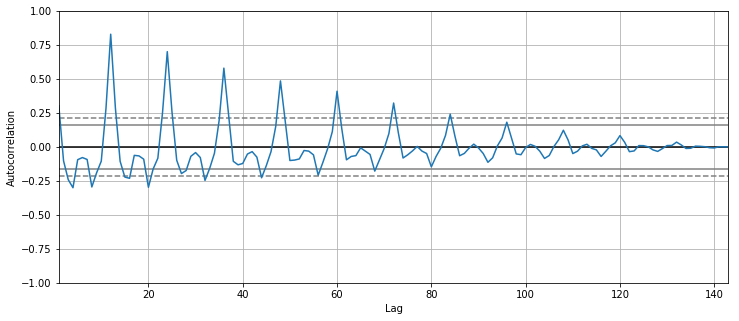

In [33]:
# your code here
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(df_pass_diff.dropna())

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


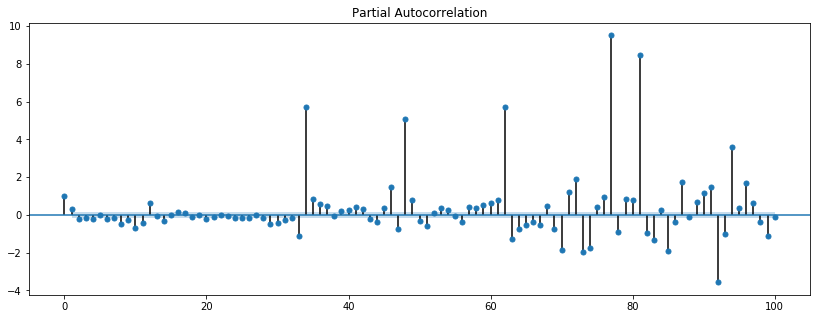

In [34]:
# your code here
rcParams['figure.figsize'] = 14, 5

plot_pacf(df_pass_diff.dropna(), lags = 100);

### Your conclusion here

Correlation is higher at the beginning and then decreases as lags increase.

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [35]:
# your code here
NYSE = pd.read_csv('NYSE_monthly.csv')
NYSE.head()

,Month,monthly_return
0,1961-01,0.082
1,1961-02,0.059
2,1961-03,0.050
3,1961-04,0.008
4,1961-05,0.042


In [37]:
NYSE['Month'] = pd.to_datetime(NYSE.Month)
NYSE.set_index('Month', inplace = True)

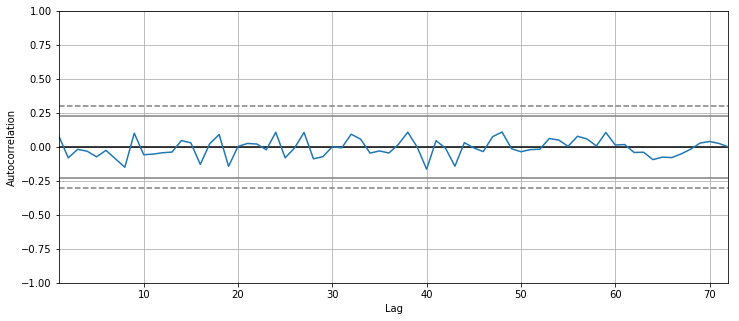

In [38]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(NYSE.dropna())

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1275: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k] * X[k:]).sum() / denom(k)


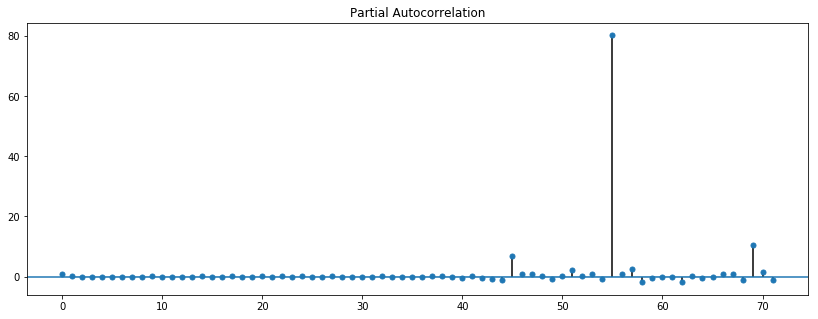

In [40]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(NYSE, lags = 100);

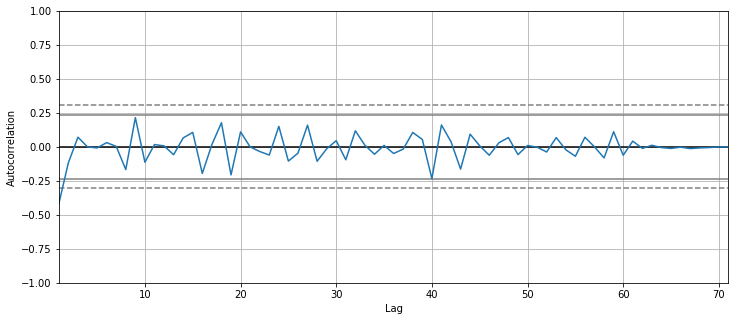

In [41]:
NYSE_diff = NYSE.diff(periods = 1)
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(NYSE_diff.dropna())

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1275: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k] * X[k:]).sum() / denom(k)


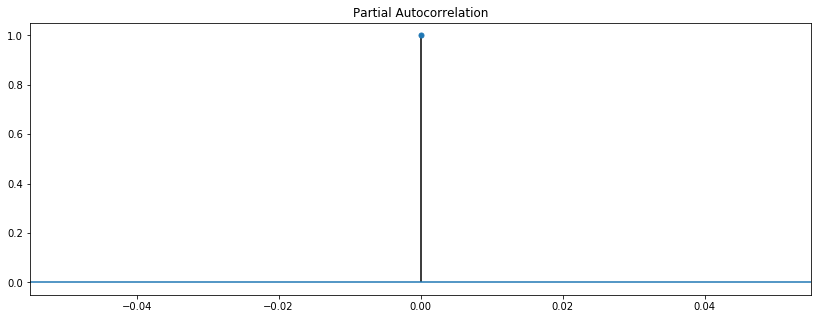

In [42]:
rcParams['figure.figsize'] = 14, 5

plot_pacf(NYSE_diff, lags = 100);

## Your conclusion here



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!